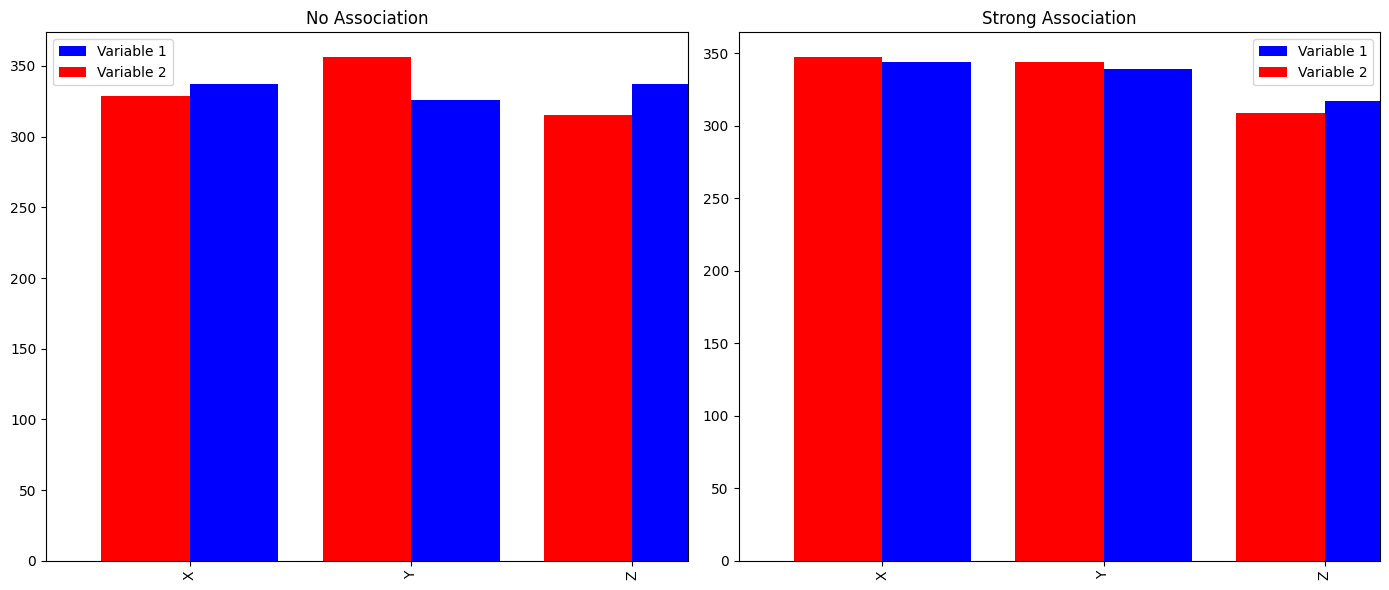

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Number of samples for each dataset
N = 1000

# 1. Datasets for Chi-squared test and Cramer's V
# 1.1 No association
cat1_no_assoc = np.random.choice(['A', 'B', 'C'], size=N)
cat2_no_assoc = np.random.choice(['X', 'Y', 'Z'], size=N)

# 1.2 Strong association (when cat1 is 'A', cat2 is most likely 'X', etc.)
mapping = {'A': 'X', 'B': 'Y', 'C': 'Z'}
cat1_strong_assoc = np.random.choice(['A', 'B', 'C'], size=N)
cat2_strong_assoc = [mapping[val] if np.random.rand() < 0.8 else np.random.choice(['X', 'Y', 'Z']) for val in cat1_strong_assoc]

# 2. Datasets for PSI
# 2.1 Similar distributions
scores_reference_similar = np.random.normal(600, 50, N)
scores_production_similar = np.random.normal(605, 50, N)

# 2.2 Different distributions
scores_reference_diff = np.random.normal(600, 50, N)
scores_production_diff = np.random.normal(650, 50, N)

datasets = {
    'Chi-squared & Cramer\'s V': {
        'No Association': (cat1_no_assoc, cat2_no_assoc),
        'Strong Association': (cat1_strong_assoc, cat2_strong_assoc)
    },
    'PSI': {
        'Similar Distributions': (scores_reference_similar, scores_production_similar),
        'Different Distributions': (scores_reference_diff, scores_production_diff)
    }
}

# Visualizing the first set of datasets (for categorical variables)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
pd.Series(cat1_no_assoc).value_counts().sort_index().plot(kind='bar', ax=axes[0], position=0, width=0.4, color='blue', label='Variable 1')
pd.Series(cat2_no_assoc).value_counts().sort_index().plot(kind='bar', ax=axes[0], position=1, width=0.4, color='red', label='Variable 2')
axes[0].set_title('No Association')
axes[0].legend()

pd.Series(cat1_strong_assoc).value_counts().sort_index().plot(kind='bar', ax=axes[1], position=0, width=0.4, color='blue', label='Variable 1')
pd.Series(cat2_strong_assoc).value_counts().sort_index().plot(kind='bar', ax=axes[1], position=1, width=0.4, color='red', label='Variable 2')
axes[1].set_title('Strong Association')
axes[1].legend()

plt.tight_layout()
plt.show()


In [2]:
from pureml_evaluate.drift_evaluator.based_on_dataset.discrete import Discrete 

In [3]:
dd = Discrete()
dd.reference = scores_reference_similar
dd.production = scores_production_similar
dd.compute()

{'chi_squared_statistic': {'value': 4021.0754461324786},
 'cramers_v': {'value': {0: 1.0000000000000009}},
 'population_stability_index': {'value': 0.026925825736179524}}

In [4]:
from pureml_evaluate.drift_evaluator.feature_drift import FeatureLabelDrift

fd = FeatureLabelDrift()
fd.reference = scores_reference_similar
fd.production = scores_reference_diff
fd.kwargs = {'dataset_types' : 'discrete'}
fd.compute()

{'chi_squared_statistic': {'value': 3936.2134798905972}, 'cramers_v': {'value': {0: 1.0000000000000009}}, 'population_stability_index': {'value': 0.012081011737756204}}
